In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

import sys
import collections
import numpy as np
sys.path.append("/private/home/alexandrerame/domainbedv2/")
sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

In [4]:
from diversity.home import home0_isit,  home0_idit
from diwadinit.home import home0_llm_idit_filter, home0_llm_idit_rank

In [5]:
from domainbed.codeplot import plot
plot.plt.rcParams["figure.figsize"] = (5, 5)

# Linear mode connectivity for fts with different inits

In [15]:
home0_llm_idit_filter.labels

['DN to IM',
 'DN0 to IM',
 'WILD to IM',
 'DN1 to IM',
 'DN4 to IM',
 'WILD to DN',
 'DN1 to DN',
 'DN4 to DN',
 'DN to IM M=20',
 'DN0 to IM M=20',
 'Env1: DN to IM M=20',
 'Env1: DN0 to IM M=20',
 'Env2: DN to IM M=20',
 'Env2: DN0 to IM M=20',
 'Env2: DN4 to IM M=20',
 'Env3: DN to IM M=20',
 'Env3: DN0 to IM M=20']

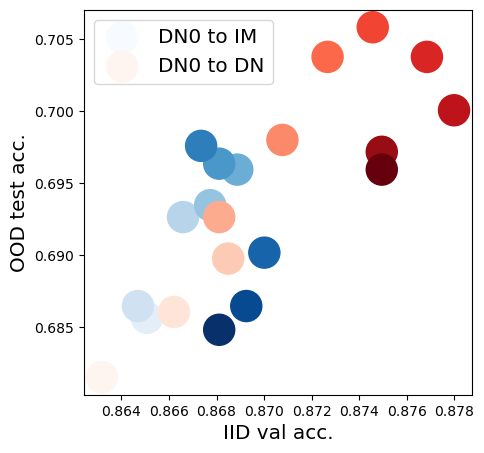

In [5]:
list_indexes = 0+np.array([0, 3, 6, 9])
list_indexes = 0+np.array([0, 3, 4, 5])
list_indexes = 0+np.array([0, 12, 13, 14, 15, 16, 17])
list_indexes = 0+np.array([13, 15])
fig_dr = plot.plot_key(
    home0_llm_idit_rank.l, key1="train_acc", key2="acc", labels=home0_llm_idit_rank.labels, order=0, loc="upper left",
    list_indexes=list_indexes, keycolor="weighting", colors=["Blues", "Reds"]
)


In [21]:
len(home0_llm_idit_filter.labels)

17

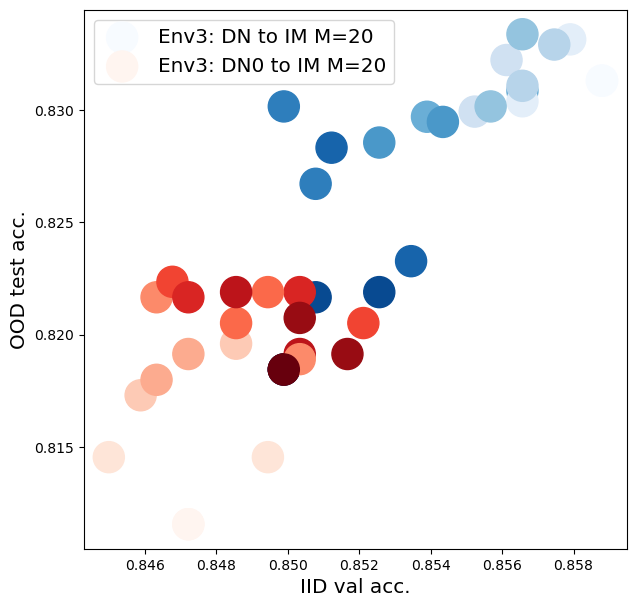

In [30]:
list_indexes = 0+np.array([15, 16])
fig_dr = plot.plot_key(
    home0_llm_idit_filter.l,
    key1="train_acc",
    key2="acc",
    labels=home0_llm_idit_filter.labels,
    order=0,
    loc="upper left",
    list_indexes=list_indexes,
    keycolor="weighting",
)


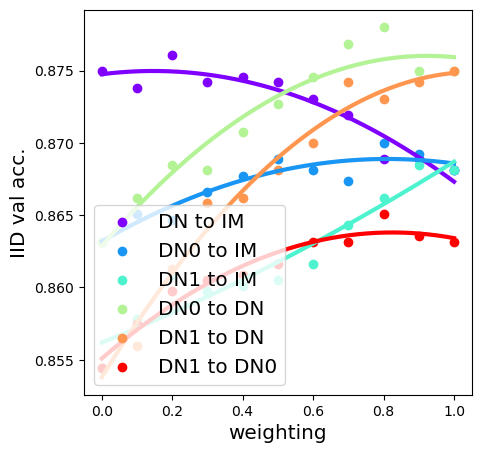

In [6]:
list_indexes = 0+np.array([0, 3, 6, 9])
list_indexes = 0+np.array([0, 3, 4, 5])
list_indexes = 0+np.array([12, 13, 14, 15, 16, 17])
fig_dr = plot.plot_key(
    home0_llm_idit_rank.l, key1="weighting", key2="train_acc", labels=home0_llm_idit_rank.labels, order=2, loc="lower left",
    list_indexes=list_indexes
)


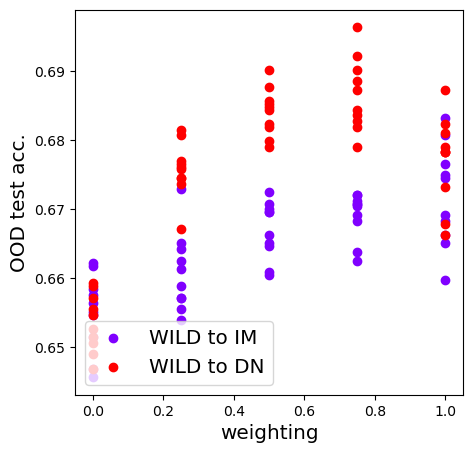

In [11]:

list_indexes = [2, 5]
fig_dr = plot.plot_key(
    home0_llm_idit_filter.l,
    key1="weighting",
    key2="acc",
    labels=home0_llm_idit_filter.labels,
    order=0,
    loc="lower left",
    list_indexes=list_indexes
)


In [12]:
def merge(l1, l2):
    for key, value in l2.items():
        assert key in l1, (l1, key)
        if isinstance(value, str):
            assert l1[key] == value
        else:
            l1[key] = (l1[key] * l1["count"] + l2[key] *1) / (l1["count"]+1)

home0_llm_idit_filter.lclean = {}
for k, l in home0_llm_idit_filter.l.items():
    home0_llm_idit_filter.lclean[k] = {}
    for line in l:
        if line["weighting"] in home0_llm_idit_filter.lclean[k]:
            merge(home0_llm_idit_filter.lclean[k][line["weighting"]], line)
        else:
            home0_llm_idit_filter.lclean[k][line["weighting"]] = line
            home0_llm_idit_filter.lclean[k][line["weighting"]]["count"] = 1
home0_llm_idit_filter.clean = {
    key: list(value.values())
    for key, value in home0_llm_idit_filter.lclean.items()
}


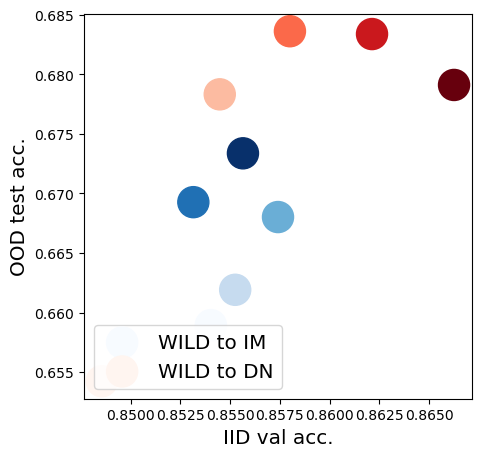

In [14]:
list_indexes = [2, 5]
fig_dr = plot.plot_key(
    home0_llm_idit_filter.clean,
    key1="train_acc",
    key2="acc",
    labels=home0_llm_idit_filter.labels,
    order=0,
    loc="lower left",
    list_indexes=list_indexes,
    keycolor="weighting",
    colors=["Blues", "Reds"]
)


In [ ]:

list_indexes = 0 + np.array([15, 16])
fig_dr = plot.plot_key(
    home0_llm_idit_filter.l,
    key1="weighting",
    key2="train_acc",
    labels=home0_llm_idit_filter.labels,
    order=2,
    loc="lower left",
    list_indexes=list_indexes
)


In [ ]:

list_indexes = 0 + np.array([15, 16])
fig_dr = plot.plot_key(
    home0_llm_idit_filter.l,
    key1="train_acc",
    key2="acc",
    labels=home0_llm_idit_filter.labels,
    order=0,
    loc="lower left",
    list_indexes=list_indexes,
    keycolor="weighting",
    colors=["Blues", "Reds"]
)


In [ ]:
list_indexes = 0+np.array([0, 3, 6, 9])
list_indexes = 0+np.array([0, 3, 4, 5])
list_indexes = 0+np.array([12, 13, 14, 15, 16, 17])
fig_dr = plot.plot_key(
    home0_llm_idit_rank.l,
    key1="divr_netm",
    key2="divr_netfirst",
    labels=home0_llm_idit_rank.labels,
    order=0,
    loc="lower right",
    diag=True,
    list_indexes=list_indexes,
    lambda_filtering=lambda x: x["weighting"] == 0,
)


# Diversity accuracy

In [5]:
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="divr_netm",
    key2="acc_netm",
    lambda_filtering=lambda x: x["step"] == 4900
)


NameError: name 'home0_div_imdn0dn1_idit_step' is not defined

In [ ]:
l = [[line for line in ll if "acc_netm" in line] for ll in home0_idit.l]

fig_dr = plot.plot_key(l, key1="divr_netm", key2="acc_netm", labels=home0_idit.labels)

In [ ]:

fig_dr = plot.plot_key(home0_idit.l+home0_isit.l, key1="divr_netm", key2="acc-acc_netm", labels=home0_idit.labels + home0_isit.labels)

In [ ]:
fig = plot.plot_histogram(
    home0_idit.l[:1] + home0_isit.l[:2],
    labels=home0_idit.labels[:1] + home0_isit.labels[:2],
    key="divr_netm",
    limits={}
)


In [ ]:
fig = plot.plot_histogram(
    home0_idit.l + home0_isit.l,
    labels=home0_idit.labels + home0_isit.labels,
    key="divr_netm",
    limits={}
)


In [ ]:
fig = plot_diversity.plot_diversity_aux(home0_idit.l, labels=home0_idit.labels, key="divr_netm", length=None, limits={})

# Along training steps

In [43]:
from diversity.home import home_subwa_step
plot.MUL = 1000

In [1]:
fig = plot.plot_key(
    home_subwa_step.l,
    labels=home_subwa_step.labels,
    key1="acc_wa01",
    key2="acc_wa12",
    list_indexes=range(1),
    lambda_filtering=lambda x: x.get("testenv") == 0 and x["step"] == 100,
    loc="lower left"
)


NameError: name 'plot' is not defined

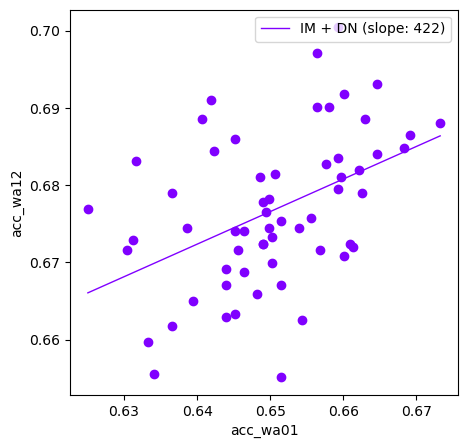

In [29]:
fig = plot.plot_key(
    home_subwa_step.l,
    labels=home_subwa_step.labels,
    key1="acc_wa01",
    key2="acc_wa12",
    lambda_filtering=lambda x: x["step"] > 2000 and x.get("testenv") == 0
)


In [7]:
from diversity.home import home0_div_imdn0dn1_idit_step, home0_div_imdn0dn1_isit_step_top2
plot.MUL = 1000

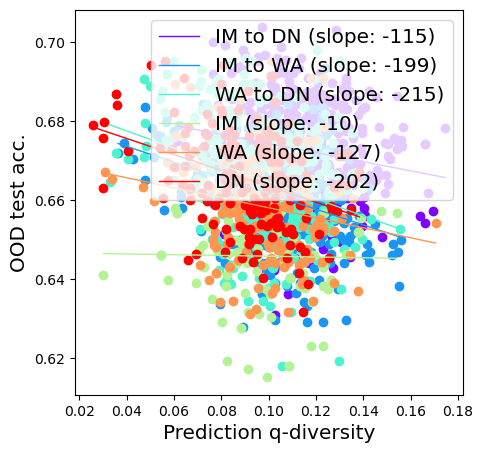

In [13]:
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="1-divq_netm",
    key2="acc",
    lambda_filtering=lambda x: x["step"] > 4000 and x.get("testenv", 0) == 0
)


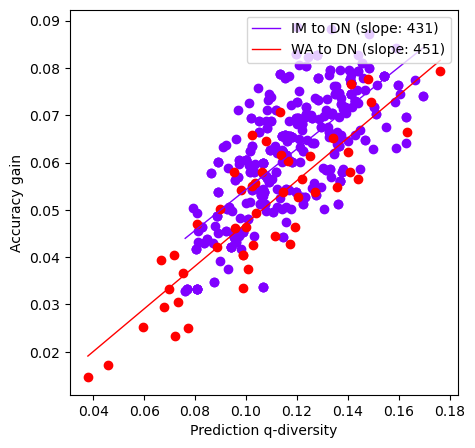

In [49]:
fig = plot.plot_key(
    home0_idit.l,
    labels=home0_idit.labels,
    key1="1-divq_netm",
    key2="acc-acc_netm",
    order=1,
    lambda_filtering=lambda x: x["step"] == "last" and x.get("testenv", 0) == 0
)


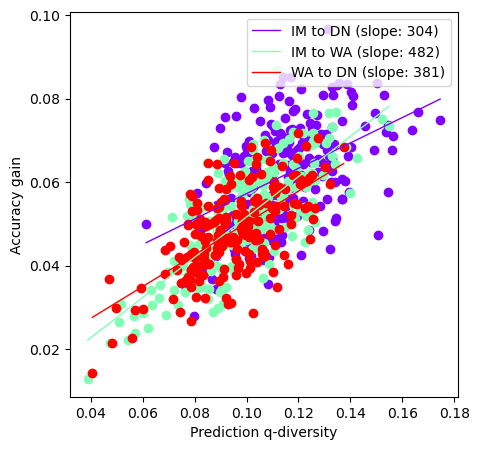

In [51]:
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l,
    labels=home0_div_imdn0dn1_idit_step.labels,
    key1="1-divq_netm",
    key2="acc-acc_netm",
    order=1,
    lambda_filtering=lambda x: x["step"] > 4500  and x.get("testenv", 0) == 0
)


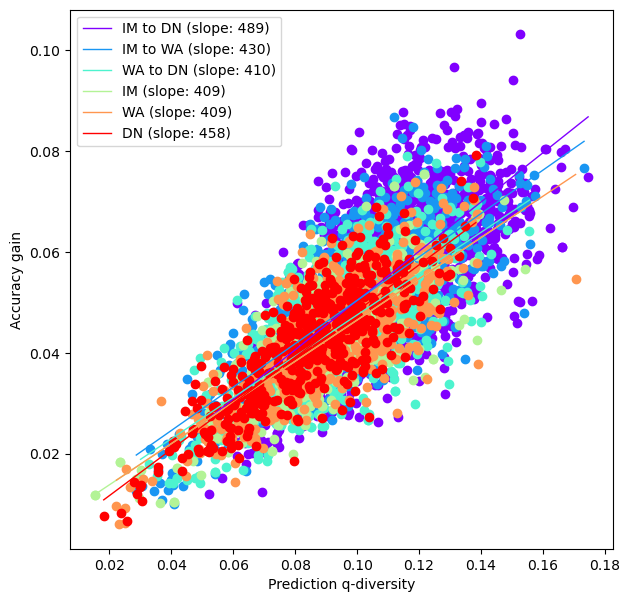

In [15]:
plot.SIZE="medium"
plot.MUL=1000
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="1-divq_netm",
    key2="acc-acc_netm",
    lambda_filtering=lambda x: x["step"] > 1000  and x.get("test_env", 0) == 0,
    loc="upper left"
)


In [ ]:
plot.MUL=1000

In [ ]:
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="1-divq_netm",
    key2="acc-acc_netm",
    lambda_filtering=lambda x: x["step"] > 2000 and x.get("testenv", 0) == 0,
    order=1
)


In [ ]:
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="1-divq_netm",
    key2="acc-acc_netm",
    lambda_filtering=lambda x: x["step"] > 2000,
    order=1
)


In [ ]:
plot.MUL=1000
plot.plt.rcParams["figure.figsize"] = (5, 5)
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="1-divq_netm",
    key2="acc-acc_ens",
    lambda_filtering=lambda x: x["step"] > 2000,
    order=1
)


In [ ]:
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="step",
    key2="1-divq_netm",
    # key2="acc-acc_netm",
    order=0
)


In [ ]:
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="1-divq_netm",
    key2="acc-acc_ens",
    lambda_filtering=lambda x: x["step"] > 2000,
    order=1
)


In [ ]:
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="step",
    key2="acc-acc_ens",
    order=0,
    loc="lower left"
)



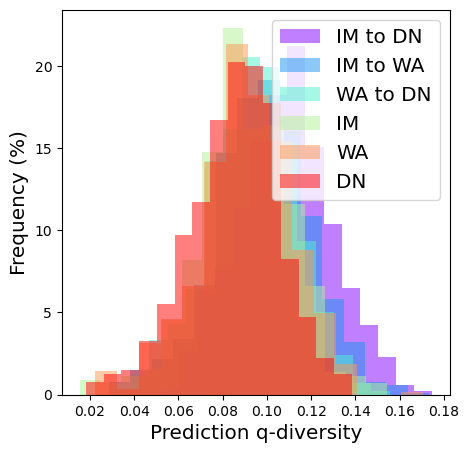

In [17]:
fig = plot.plot_histogram(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key="1-divq_netm",
    limits={},
    lambda_filtering=lambda x: x["step"] > 1000 and x.get("test_env", 0) == 0,
)


# OLD

In [ ]:
l = plot.merge(home0_isit.l)
save_fig(fig_df, "home0_diffrunslargehpnosh_df_soup-netm.png")


In [ ]:
dict_key_to_limit_netm = {"net": [0.52, 0.68], "netm": [0.52, 0.68]}

fig_netm_soup = plot.plot_key(
    l=plot.merge(l, lsoup),
    key1="netm",
    key2="soup",
    order=1,
    label="No",
    _dict_key_to_limit=dict_key_to_limit_netm,
    fcard=2,
    diag=True,
    _dict_key_to_label="2",
    linestyle="dotted"
)


In [ ]:
THESS=False
dict_key_to_limit_netm = {"net": [0.57, 0.68], "netm": [0.52, 0.68]}
plot.plt.rcParams["figure.figsize"] = (7,5)

fig_ensm210_soup = plot.plot_key(l=plot.merge(l, lsoup)[:-1], key1="net", key2="soup", order="", label="M=", _dict_key_to_limit=dict_key_to_limit_netm, diag=True, _dict_key_to_label="def", linestyle="dotted", loc="upper left")

In [ ]:

def plot_slopes_c():
    fig = plt.figure()
    dr = [0, 116, 174, 196, 208, 235, 259, 282, 297]
    dr = [d/1000 for d in dr]
    df = [0, 68, 103, 121, 114, 130, 128, 159, 179]
    df = [d/1000 for d in df]
    m = list(range(1, 10))

    colors = cm.rainbow(np.linspace(0.2, 1, 2))
    plt.scatter(m, dr, label="Prediction diversity", color=colors[0])
    plot.fit_and_plot_with_value(m, dr, order="log", label=None, color=colors[0], ax=None)
    plt.scatter(m, df, label="Feature diversity", color=colors[1])
    plot.fit_and_plot_with_value(m, df, order="log", label=None, color=colors[1], ax=None)
    plt.xlabel("M", fontsize="x-large")
    plt.ylabel(r"Slope",  fontsize="x-large")
    plt.legend(fontsize="x-large")
    return fig
plot.plt.rcParams["figure.figsize"] = (8,5)
fig_slope = plot_slopes_c()
plot.save_fig(fig_slope, "home0_m_slope.png")